In [1]:
# change directory
%cd drive/My\ Drive/Colab\ Notebooks/DLG/slack_report/slack-report-2020

/content/drive/My Drive/Colab Notebooks/DLG/slack_report/slack-report-2020


In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 2.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=53a275981892e337f6ab5a6f3f57c2d6bd17f6628a6a5b4031f63659be16ce36
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [ ]:
import pandas as pd, networkx as nx, pickle, matplotlib.pyplot as plt
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [ ]:
with open('period_ntw.pkl', 'rb') as f:
  ntw_dict = pickle.load(f)

In [ ]:
ntw_dict.keys()

dict_keys([('2019-06-01', '2019-07-01'), ('2019-07-01', '2019-08-01'), ('2019-08-01', '2019-09-01'), ('2019-09-01', '2019-10-01'), ('2019-10-01', '2019-11-01'), ('2019-11-01', '2019-12-01'), ('2019-12-01', '2020-01-01'), ('2020-01-01', '2020-02-01'), ('2020-02-01', '2020-03-01'), ('2020-03-01', '2020-04-01'), ('2020-04-01', '2020-05-01'), ('2020-05-01', '2020-06-01'), ('2020-06-01', '2020-07-01'), ('2020-07-01', '2020-08-01'), ('2019-06-01', '2020-08-01')])

In [ ]:
df_user = ntw_dict[('2020-06-01', '2020-07-01')]['df_user']

In [ ]:
def create_one_period_describes(df_user, target_period, target_columns):
  df_tmp_describe = df_user[target_columns].describe()
  for c in target_columns:
    df_tmp_describe.loc['max_user', c ] = ','.join(df_user[df_user[c]==df_tmp_describe.loc['max',c]]['name'])
  df_tmp_describe.columns = [c+f'_{target_period}' for c in df_tmp_describe.columns]
  return df_tmp_describe

In [ ]:
analysis_index_names = ['degree', 'degree_centrality', 'betweenness_centrality']
df_all_descrives = pd.concat([create_one_period_describes(dic['df_user'], p, analysis_index_names) for p, dic in ntw_dict.items()],axis=1)

In [ ]:
df_degree_trend = df_all_descrives[[c for c in df_all_descrives.columns if 'degree_(' in c]].iloc[:,1:-2]
df_degree_trend

,"degree_('2019-07-01', '2019-08-01')","degree_('2019-08-01', '2019-09-01')","degree_('2019-09-01', '2019-10-01')","degree_('2019-10-01', '2019-11-01')","degree_('2019-11-01', '2019-12-01')","degree_('2019-12-01', '2020-01-01')","degree_('2020-01-01', '2020-02-01')","degree_('2020-02-01', '2020-03-01')","degree_('2020-03-01', '2020-04-01')","degree_('2020-04-01', '2020-05-01')","degree_('2020-05-01', '2020-06-01')","degree_('2020-06-01', '2020-07-01')"
count,3,5,10,12,26,20,28,23,23,25,26,22
mean,2,3.2,3,4,5.46154,5.4,6,6.52174,7.56522,7.52,6.38462,5.90909
std,0,0.83666,2.16025,2.44949,4.82685,4.18519,5.2845,4.78511,5.59891,5.58361,5.29964,4.4068
min,2,2,2,2,2,2,2,2,2,2,2,2
25%,2,3,2,3,3,3,2,3,3,3,2,3
50%,2,3,2,3,4,4,4,4,6,7,4.5,4
75%,2,4,3,4,6.75,5,9.25,9,11,9,8.75,7
max,2,4,9,11,24,19,26,21,22,24,23,20
max_user,"村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,Satoru Mikami,相川 仁","村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,増田貴志.ﾃﾞｰﾀｱｰｷﾃｸﾄ",村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析


In [ ]:
xlabels = [x[0] for x in ntw_dict.keys()][1:-2]
xlabels

['2019-07-01',
 '2019-08-01',
 '2019-09-01',
 '2019-10-01',
 '2019-11-01',
 '2019-12-01',
 '2020-01-01',
 '2020-02-01',
 '2020-03-01',
 '2020-04-01',
 '2020-05-01',
 '2020-06-01']

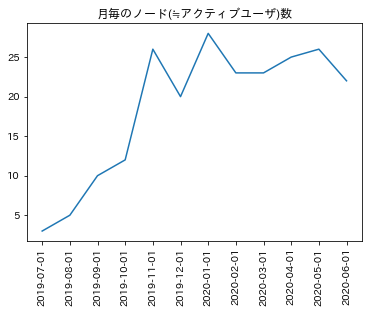

In [ ]:
plt.clf()
plt.plot(xlabels, df_degree_trend.loc['count',:])
plt.xticks(rotation = 90)
plt.title('月毎のノード(≒アクティブユーザ)数')
plt.show()

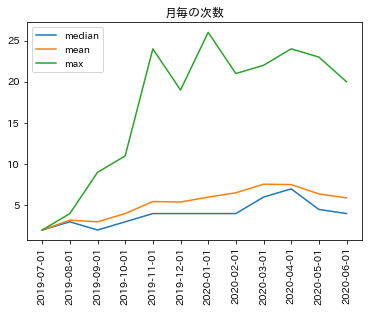

In [ ]:
plt.clf()
plt.plot(xlabels, df_degree_trend.loc['50%',:], label = 'median')
plt.plot(xlabels, df_degree_trend.loc['mean',:], label = 'mean')
plt.plot(xlabels, df_degree_trend.loc['max',:], label = 'max')
#plt.plot(xlabels, df_degree_trend.loc['count',:], label = 'ユーザ数')
plt.legend()
plt.xticks(rotation = 90)
plt.title('月毎の次数')
plt.show()

In [ ]:
df_degree_cntr = df_all_descrives[[c for c in df_all_descrives.columns if 'degree_c' in c]].iloc[:,1:-2]
df_degree_cntr

,"degree_centrality_('2019-07-01', '2019-08-01')","degree_centrality_('2019-08-01', '2019-09-01')","degree_centrality_('2019-09-01', '2019-10-01')","degree_centrality_('2019-10-01', '2019-11-01')","degree_centrality_('2019-11-01', '2019-12-01')","degree_centrality_('2019-12-01', '2020-01-01')","degree_centrality_('2020-01-01', '2020-02-01')","degree_centrality_('2020-02-01', '2020-03-01')","degree_centrality_('2020-03-01', '2020-04-01')","degree_centrality_('2020-04-01', '2020-05-01')","degree_centrality_('2020-05-01', '2020-06-01')","degree_centrality_('2020-06-01', '2020-07-01')"
count,3,5,10,12,26,20,28,23,23,25,26,22
mean,1,0.8,0.333333,0.363636,0.218462,0.284211,0.222222,0.296443,0.343874,0.313333,0.255385,0.281385
std,0,0.209165,0.240027,0.222681,0.193074,0.220273,0.195722,0.217505,0.254496,0.23265,0.211985,0.209848
min,1,0.5,0.222222,0.181818,0.08,0.105263,0.0740741,0.0909091,0.0909091,0.0833333,0.08,0.0952381
25%,1,0.75,0.222222,0.272727,0.12,0.157895,0.0740741,0.136364,0.136364,0.125,0.08,0.142857
50%,1,0.75,0.222222,0.272727,0.16,0.210526,0.148148,0.181818,0.272727,0.291667,0.18,0.190476
75%,1,1,0.333333,0.363636,0.27,0.263158,0.342593,0.409091,0.5,0.375,0.35,0.333333
max,1,1,1,1,0.96,1,0.962963,0.954545,1,1,0.92,0.952381
max_user,"村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,Satoru Mikami,相川 仁","村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,増田貴志.ﾃﾞｰﾀｱｰｷﾃｸﾄ",村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析


In [ ]:
dgr_ctr_all = df_all_descrives.loc['50%','degree_centrality_(\'2019-06-01\', \'2020-08-01\')']
dgr_ctr_all

0.08791208791208792

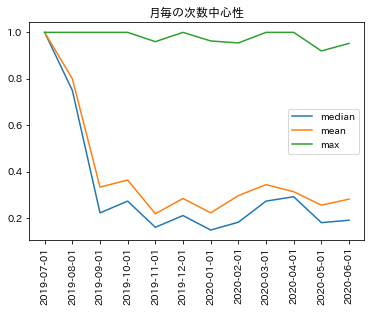

In [ ]:
plt.clf()
plt.plot(xlabels, df_degree_cntr.loc['50%',:], label = 'median')
plt.plot(xlabels, df_degree_cntr.loc['mean',:], label = 'mean')
plt.plot(xlabels, df_degree_cntr.loc['max',:], label = 'max')
#plt.hlines(y=dgr_ctr_all,xmin=0, xmax = 12, label = 'all period median', linestyles='--')
plt.legend()
plt.xticks(rotation = 90)
plt.title('月毎の次数中心性')
plt.show()

In [ ]:
df_btw_cntr = df_all_descrives[[c for c in df_all_descrives.columns if 'bet' in c]].iloc[:,1:-2]
df_btw_cntr

,"betweenness_centrality_('2019-07-01', '2019-08-01')","betweenness_centrality_('2019-08-01', '2019-09-01')","betweenness_centrality_('2019-09-01', '2019-10-01')","betweenness_centrality_('2019-10-01', '2019-11-01')","betweenness_centrality_('2019-11-01', '2019-12-01')","betweenness_centrality_('2019-12-01', '2020-01-01')","betweenness_centrality_('2020-01-01', '2020-02-01')","betweenness_centrality_('2020-02-01', '2020-03-01')","betweenness_centrality_('2020-03-01', '2020-04-01')","betweenness_centrality_('2020-04-01', '2020-05-01')","betweenness_centrality_('2020-05-01', '2020-06-01')","betweenness_centrality_('2020-06-01', '2020-07-01')"
count,3,5,10,12,26,20,28,23,23,25,26,22
mean,0,0.0666667,0.0833333,0.0636364,0.0348718,0.0397661,0.0311355,0.0350085,0.0312441,0.0298551,0.0326923,0.0372294
std,0,0.0912871,0.248969,0.171899,0.125801,0.124014,0.115606,0.091868,0.0773786,0.0875011,0.0902151,0.0986069
min,0,0,0,0,0,0,0,0,0,0,0,0
25%,0,0,0,0,0,0,0,0,0,0,0,0
50%,0,0,0,0.00454545,0.00208333,0.00170565,0.00328992,0.0018759,0,0.00362319,0.000666667,0.00472222
75%,0,0.166667,0.0138889,0.0204545,0.00875,0.00511696,0.0132982,0.0325706,0.0208926,0.014592,0.0200602,0.0196825
max,0,0.166667,0.791667,0.604545,0.643722,0.554094,0.615437,0.441146,0.352422,0.434252,0.445399,0.45963
max_user,"村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,Satoru Mikami,相川 仁","村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,増田貴志.ﾃﾞｰﾀｱｰｷﾃｸﾄ",村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析


In [ ]:
btw_ctr_all = df_all_descrives.loc['50%','betweenness_centrality_(\'2019-06-01\', \'2020-08-01\')']
btw_ctr_all

8.846668187327527e-05

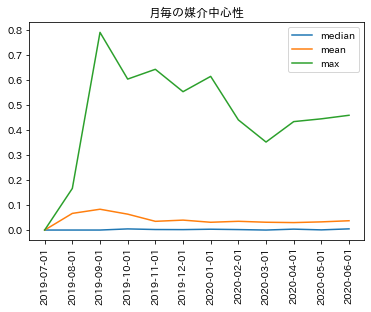

In [ ]:
plt.clf()
plt.plot(xlabels, df_btw_cntr.loc['50%',:], label = 'median')
plt.plot(xlabels, df_btw_cntr.loc['mean',:], label = 'mean')
plt.plot(xlabels, df_btw_cntr.loc['max',:], label = 'max')
plt.legend()
plt.xticks(rotation = 90)
plt.title('月毎の媒介中心性')
plt.show()

In [ ]:
df_all_period_des = df_all_descrives[[c for c in df_all_descrives.columns if '\'2019-06-01\', \'2020-08-01\'' in c]]
df_all_period_des

,"degree_('2019-06-01', '2020-08-01')","degree_centrality_('2019-06-01', '2020-08-01')","betweenness_centrality_('2019-06-01', '2020-08-01')"
count,92,92,92
mean,13.1304,0.14429,0.00991134
std,14.8947,0.163678,0.0519189
min,2,0.021978,0
25%,3,0.032967,0
50%,8,0.0879121,8.84667e-05
75%,17.25,0.18956,0.0017484
max,89,0.978022,0.491867
max_user,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析,村上智之 ｷﾞﾙﾄﾞ代表 ﾎﾟｰｶｰで学ぶﾃﾞｰﾀ分析


In [ ]:
df_all_period_user = ntw_dict['2019-06-01', '2020-08-01']['df_user']
df_all_period_user.index = df_all_period_user['name']

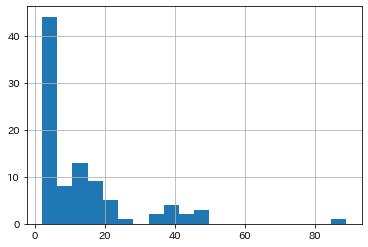

In [ ]:
df_all_period_user['degree'].hist(bins = 20)

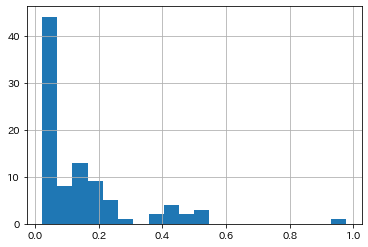

In [ ]:
df_all_period_user['degree_centrality'].hist(bins = 20)

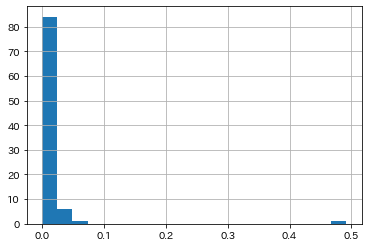

In [ ]:
df_all_period_user['betweenness_centrality'].hist(bins = 20)

In [5]:
# 次数ユーザーランキング
# df_all_period_user.sort_values(by = 'degree', ascending=True).tail(20)['degree'].plot.barh(title = '次数ユーザランキング')

In [6]:
# 次数中心性ランキング
# df_all_period_user.sort_values(by = 'degree_centrality', ascending=True).tail(20)['degree_centrality'].plot.barh()# 

In [7]:
# 媒介中心性ランキング
# df_all_period_user.sort_values(by = 'betweenness_centrality', ascending=True).tail(20)['betweenness_centrality'].plot.barh(title = '媒介中心性ユーザランキング')

In [ ]:
df_all_period_user.describe()

,talk_count,talk_count_range,degree,degree_centrality,betweenness_centrality
count,92.000000,92.000000,92.000000,92.000000,92.000000
mean,308.619565,2.576087,13.130435,0.144290,0.009911
std,943.818546,1.233539,14.894661,0.163678,0.051919
min,7.000000,0.000000,2.000000,0.021978,0.000000
25%,39.250000,2.000000,3.000000,0.032967,0.000000
50%,94.500000,3.000000,8.000000,0.087912,0.000088
75%,231.000000,4.000000,17.250000,0.189560,0.001748
max,8827.000000,4.000000,89.000000,0.978022,0.491867


In [ ]:
df_all_period_edge = ntw_dict['2019-06-01', '2020-08-01']['df_edges']

In [ ]:
df_all_period_edge['count'].describe()

count    604.000000
mean      12.298013
std       22.262431
min        3.000000
25%        3.000000
50%        6.000000
75%       11.000000
max      215.000000
Name: count, dtype: float64

In [ ]:
df_link_counts = pd.DataFrame([(p1,p2,len(dic['df_edges']),dic['df_edges']['count'].sum() ) for (p1,p2), dic in ntw_dict.items()], columns = ['start','end','link_count', 'sum_count'])

In [ ]:
df_link_counts_period = df_link_counts[1:-2].reset_index(drop=True)
df_link_counts_period

,start,end,link_count,sum_count
0,2019-07-01,2019-08-01,3,32.0
1,2019-08-01,2019-09-01,8,75.0
2,2019-09-01,2019-10-01,15,106.0
3,2019-10-01,2019-11-01,24,198.0
4,2019-11-01,2019-12-01,71,478.0
5,2019-12-01,2020-01-01,54,359.0
6,2020-01-01,2020-02-01,84,579.0
7,2020-02-01,2020-03-01,75,532.0
8,2020-03-01,2020-04-01,87,730.0
9,2020-04-01,2020-05-01,94,636.0


<Figure size 432x288 with 0 Axes>

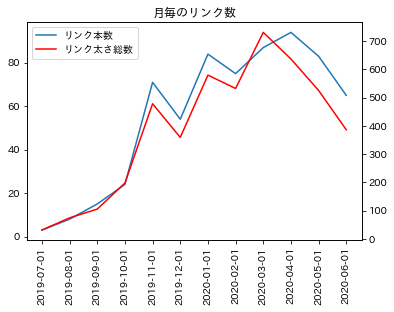

In [ ]:
plt.clf()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ln1 = ax1.plot(xlabels, df_link_counts_period['link_count'], label = 'リンク本数')
ax1.set_xticklabels(labels = xlabels, rotation = 90)

ln2 = ax2.plot(df_link_counts_period['sum_count'], label = 'リンク太さ総数', color = 'red')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.title('月毎のリンク数')
plt.show()

In [ ]:
# GM抜き
df_user_all_exclude_gm = pd.read_csv('users_ex_gm.csv')
df_user_all_exclude_gm.index = df_user_all_exclude_gm['name']
df_edge_exlude_gm = pd.read_csv('edges_ex_gm.csv')


In [2]:
# 次数ユーザーランキング
# df_user_all_exclude_gm.sort_values(by = 'degree', ascending=True).tail(20)['degree'].plot.barh(title = '次数ユーザランキング')

In [3]:
# 媒介中心性ランキング
# df_user_all_exclude_gm.sort_values(by = 'betweenness_centrality', ascending=True).tail(20)['betweenness_centrality'].plot.barh(title = '媒介中心性ユーザランキング')